In [1]:
# 04_supervised_learning.ipynb

# 1. Split the dataset into training (80%) and testing (20%) sets.
# 2. Train the Logistic Regression model.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the selected features (X_selected from 03_feature_selection.ipynb)
input_data_path = '../data/' # Relative path to data folder from notebooks folder
X = pd.read_csv(os.path.join(input_data_path, 'X_selected_features.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))

# Make sure y is a 1D array/Series for scikit-learn models
y = y.iloc[:, 0]

print("Loaded X shape for modeling:", X.shape)
print("Loaded y shape for modeling:", y.shape)

# Split the dataset into training (80%) and testing (20%) sets
# Use stratify=y to maintain the same proportion of target classes in train and test sets
# Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# --- Train Logistic Regression Model ---
print("\n--- Training Logistic Regression Model ---")

# Initialize the Logistic Regression model
# Use a solver that is robust and handle convergence warnings (e.g., 'liblinear' for small datasets)
# Set max_iter to a sufficient number to ensure convergence
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
y_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Evaluate the model (will be done comprehensively in the next step, but a quick check here)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# Store the model and its predictions/probabilities for later evaluation/comparison
models = {'Logistic Regression': log_reg_model}
predictions = {'Logistic Regression': y_pred_log_reg}
probabilities = {'Logistic Regression': y_proba_log_reg}

Loaded X shape for modeling: (303, 12)
Loaded y shape for modeling: (303,)

Shape of X_train: (242, 12)
Shape of X_test: (61, 12)
Shape of y_train: (242,)
Shape of y_test: (61,)

--- Training Logistic Regression Model ---
Logistic Regression Accuracy: 0.8525



--- Training Decision Tree Model ---

--- Training Random Forest Model ---

--- Training Support Vector Machine (SVM) Model ---

--- Model Evaluation ---

--- Logistic Regression Performance ---
Accuracy: 0.8525
Precision: 0.8276
Recall: 0.8571
F1-Score: 0.8421
AUC: 0.9459

--- Decision Tree Performance ---
Accuracy: 0.6885
Precision: 0.6286
Recall: 0.7857
F1-Score: 0.6984
AUC: 0.6959

--- Random Forest Performance ---
Accuracy: 0.8525
Precision: 0.8276
Recall: 0.8571
F1-Score: 0.8421
AUC: 0.9394

--- Support Vector Machine Performance ---
Accuracy: 0.9016
Precision: 0.8438
Recall: 0.9643
F1-Score: 0.9000
AUC: 0.9610


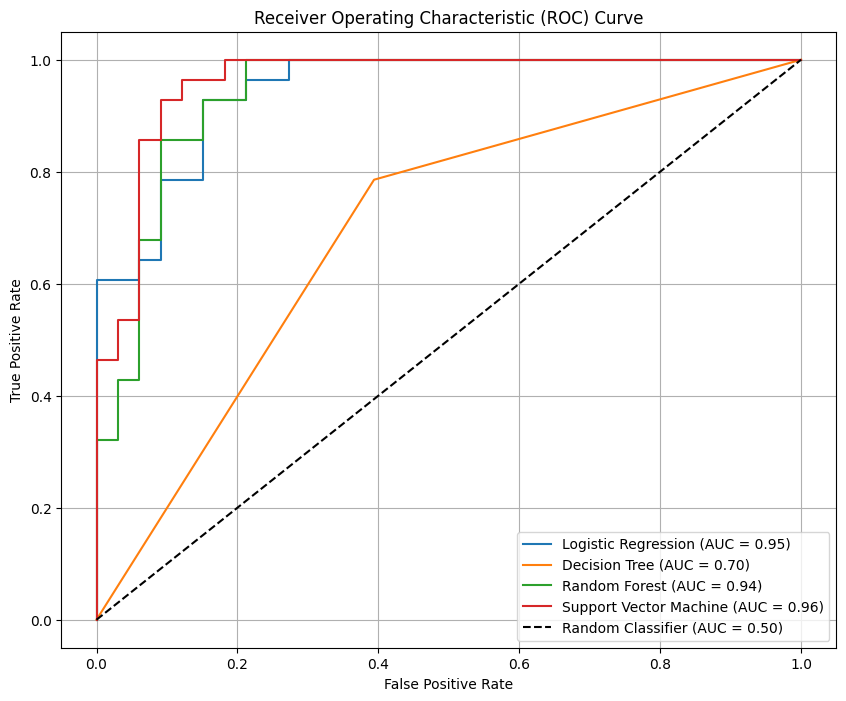


--- Summary of All Model Performances ---

Logistic Regression:
  Accuracy: 0.8525
  Precision: 0.8276
  Recall: 0.8571
  F1-Score: 0.8421
  AUC: 0.9459

Decision Tree:
  Accuracy: 0.6885
  Precision: 0.6286
  Recall: 0.7857
  F1-Score: 0.6984
  AUC: 0.6959

Random Forest:
  Accuracy: 0.8525
  Precision: 0.8276
  Recall: 0.8571
  F1-Score: 0.8421
  AUC: 0.9394

Support Vector Machine:
  Accuracy: 0.9016
  Precision: 0.8438
  Recall: 0.9643
  F1-Score: 0.9000
  AUC: 0.9610


In [2]:
# Continue 04_supervised_learning.ipynb

# Import additional models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Support Vector Classifier

# --- Train Decision Tree Model ---
print("\n--- Training Decision Tree Model ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

models['Decision Tree'] = dt_model
predictions['Decision Tree'] = y_pred_dt
probabilities['Decision Tree'] = y_proba_dt

# --- Train Random Forest Model ---
print("\n--- Training Random Forest Model ---")
# Use the same n_estimators as in feature selection for consistency
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

models['Random Forest'] = rf_model
predictions['Random Forest'] = y_pred_rf
probabilities['Random Forest'] = y_proba_rf


# --- Train Support Vector Machine (SVM) Model ---
# For SVM, use probability=True to get predict_proba, but it makes fitting slower
print("\n--- Training Support Vector Machine (SVM) Model ---")
svm_model = SVC(probability=True, random_state=42) # Set probability=True for ROC AUC
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

models['Support Vector Machine'] = svm_model
predictions['Support Vector Machine'] = y_pred_svm
probabilities['Support Vector Machine'] = y_proba_svm

# --- Evaluate Models ---
print("\n--- Model Evaluation ---")

evaluation_results = {}
plt.figure(figsize=(10, 8)) # For ROC Curve plot

for name, model in models.items():
    print(f"\n--- {name} Performance ---")
    y_pred = predictions[name]
    y_proba = probabilities[name]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': roc_auc
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\n--- Summary of All Model Performances ---")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

# You can save evaluation_results to a file if needed
# For now, just print them.